# Review Theory
**Markov Decision Processes**
* State *S*
* Action *A*
* Transitions $P(s'|s,a)(or \ T(s,a,s'))$
* Rewards $R(s,a,s')(and \ discount \ \gamma)$
* Start State $s_o$

Reinforcement Learning Type:
* Known
  * Current State
  * Available Actions
  * Experienced Rewards
 
* Unknown
  * Transition Model
  * Reward Structure
  
* Assumed
  * Markov Transitions
  * Fixed Reward For (s,a,s')
  
 Problem: Find Values for Fixed policy $\pi$ (policy evaluation) <br>
 Model-based Learning: Learn the model, solve for values <br>
 Model-free Learning: Solve for values directly (by sampling) <br>
 
** Monte Carlo Methods **
 Monte Carlo methods are a large family of computational algorithms that rely on *random sampling*. These methods are mainly used for:
* Numerical integration
* Stochastic optimization
* Characterizing distributions

Reason for using Monte Carlo vs Dynamic Programming
* No need for a complete Markov Decision Process
* Computationlly more efficient
* Can be used with stochastic simulations

** Monte Carlo Process: **
* To evaluate state s
* The first time-step t that state s is visited in an episode
* Increment counter $N(s)  \leftarrow N(s) + 1$
* Increment total return $S(s) \leftarrow S(s) + G_t$
* Value is estimated by mean return $V(s)=\frac{S(s)}{N(s)}$
* By law of large numbers, $V(s) \rightarrow v_\pi(s) \ as N(s) \rightarrow \infty$ 

** First-visit Monte Carlo policy evaluation ** <br>
Initialize:
> $\pi \leftarrow$ policy to be evaluated <br>
> $V \leftarrow$ an arbitrary state-value function
> $Returns(s) \leftarrow$ an empty list, for all $s \in S$

Repeat forever:
>(a) Generate an episode using $\pi$ <br>
>(b) For each state s appearing in the episode:
>>$R \leftarrow$ following the first occurrence of s <br>
>>Append R to *Returns(s)*
>>$V(s) \leftarrow$ average(Returns(s))

In model-free reinforcement learning, as opposed to model based, we dont know the reward function and the transition function beforehand we have to learn them through experience.<br>
In first visit monte carlo, the state value function is defined as the average of the returns following the agents first visit to s in a set of episodes.

### Exploration vs Exploitation
In Reinforcement learning an agent simultaneously attempts to acquire new knowledge (called "exploration") and optimizes its decision based on existing knowledge (called "exploitation"). The “exploration vs. exploitation tradeoff” applies systems that want to acquire new knowledge and maximize their reward at the same time. <br/>
**Multi Arm Bandits (MAB):** 
Bandit problems embody in essential form a conflict evident in all human action: choosing actions which yield immediate reward vs. choosing actions (e.g. acquiring information or preparing the ground) whose benefit will come only later. <br>
MAB is best understood through this analogy: A gambler at a row of slot machines has to decide which machines to play, how many times to play each machine and in which order to play them. When played, each machine provides a reward from a distribution specific to that machine. The objective is to maximize the sum of rewards earned through a sequence of lever pulls.

  ![MAB](Img/MAB.png) <br>
  Lets get formal and introduce some notation: <br>
• Lets Index the arms by a, and the probability distribution over possible rewards r for each arm a can be written as $pa(r)$. <br>
•  We have to find the arm with the largest mean reward  $μa=Ea[r]$. <br>
• In practice pa(r) are non-stationary <br>

So to come up with an optimal strategy to explore and exploit so as to reap maximum rewards, the model can follow 3 strategies: 
1. **Epsilon-Decreasing with Softmax** <br>
With this strategy weexplore with probability epsilon, and exploit with probability 1 — epsilon. Epsilon decreases over time, in the case of exploring a new option, we don’t just pick an option at random, but instead we estimate the outcome of each option, and then pick based on that (this is the softmax part). In other words, we try to figure out what we want to do at a young age, and then stick with it throughout our lives. Throughout high school and college we explore a variety of subjects and are open to new experiences. The older we get the more likely we are to settle on a path, and major life or career changes become less likely.  In a sense, epsilon here models our risk aversion. As we become older we become more risk-averse and less likely to explore new options, like a major career change, even if they could yield high returns.
2. **Upper-confidence bound strategy** <br>
This stratey loosely corresponds to living a very optimistic life. In addition to estimating the outcome of each option, we also calculate the confidence of our estimation. This gives us an interval of possible outcomes. Now, here’s our strategy: We always pick the option with the highest possible outcome, even if it that outcome very unlikely. The intuition behind this strategy is that options with high uncertainty usually lead to a lot of new knowledge. We don’t know enough about the option to accurately estimate the return and by pursuing that option we are bound to learn more and improve our future estimations. In simulated settings this algorithm does well when we have many options with very different variances. 
3. **Contextual-Epsilon-greedy strategy** <br>
This strategy is similar to epsilon-greedy, but we choose the value of epsilon based on how critical our situation is.When we are in a critical situation (large debt, need to provide for a sick family) we will always exploit instead of explore — We do what we know works well. If we are in a situation that is not critical we are more likely to explore new things. This strategy makes intuitive sense, but I believe that it is not commonly followed. Even in non-critcal situation we often choose to keep doing what we have always done due to our risk-averse nature.

### Monte Carlo Reinforcement Learning Tutorial
**Q Learning** <br>
* $Q = Quality$ 
* $Q =$ Long-term discounted reward we expect from taking action a in state s 
* $Q(s,a)=R(s,a)+\gamma V(s')$
* $V(s)=max_a(R(s,a)+\gamma V(s'))$
* $\pi(s)=max_a(Q(s,a))$

**Policy**
* Policy is a simple lookup table: state $\rightarrow$ best action
* Start with a random policy
* Play the game, use experience to improve value estimates
* Better value estimates improve policy

**Returns (G)**
* Return: the reward from our immediate action, plus all discounted future rewards from applying the current policy
* Denoted by capital G
* $G_t=r_{t+1}+\gamma G_{t+1}$
* Work in reverse from the final state applying this formula
* Once (s, G) several pairs are collected, average them to estimate the value of each state

**Algorithm to Calculate Returns** <br>
1. Initialize G to 0
2. states_and_returns =[]
3. loop backwards through the list of states_and_rewards (s, r):
 4. appends(s, G) to states_and_returns
 5. $G = r+\gamma*G$
6. Reverse states_and_returns to the original order  

**Explore / Exploit Dilemma**
* We must strike a balance between explore / exploit
* We are going to use a strategy called "epsilon greedy"
* Epsilon is the probability that our agent will choose a random action instead of following policy

**Epsilon Greedy Algorithm**
1. generate a random number p, between 0 and 1
2. if $p < (1-\varepsilon)$ take the action dictated by policy
3. otherwise take a random action

**First Visit Optimization**
* What happens if we visit the same state more than once?
* It's been proven subsequent visits won't change the answer
* All we need is the first visit
* We throw the rest of the data away

**Monte Carlo Q Learning Algorithm** <br>
![Monte Carlo Algorithm](Img/Monte_Carlo_Algorithm.png)
    



## Implement Monte Carlo in Code

In [0]:
# Create Grid World as an environment for reinforcement model
# Code from https://github.com/colinskow/move37/blob/master/dynamic_programming/grid_world.py
from __future__ import print_function, division
from builtins import range
# Note: you may need to update your version of future
# sudo pip install -U future

import numpy as np


class Grid: # Environment
  def __init__(self, width, height, start):
    # i is vertical axis, j is horizontal
    self.width = width
    self.height = height
    self.i = start[0]
    self.j = start[1]

  def set(self, rewards, actions, obey_prob):
    # rewards should be a dict of: (i, j): r (row, col): reward
    # actions should be a dict of: (i, j): A (row, col): list of possible actions
    self.rewards = rewards
    self.actions = actions
    self.obey_prob = obey_prob

  def non_terminal_states(self):
    return self.actions.keys()

  def set_state(self, s):
    self.i = s[0]
    self.j = s[1]

  def current_state(self):
    return (self.i, self.j)

  def is_terminal(self, s):
    return s not in self.actions

  def stochastic_move(self, action):
    p = np.random.random()
    if p <= self.obey_prob:
      return action
    if action == 'U' or action == 'D':
      return np.random.choice(['L', 'R'])
    elif action == 'L' or action == 'R':
      return np.random.choice(['U', 'D'])

  def move(self, action):
    actual_action = self.stochastic_move(action)
    if actual_action in self.actions[(self.i, self.j)]:
      if actual_action == 'U':
        self.i -= 1
      elif actual_action == 'D':
        self.i += 1
      elif actual_action == 'R':
        self.j += 1
      elif actual_action == 'L':
        self.j -= 1
    return self.rewards.get((self.i, self.j), 0)

  def check_move(self, action):
    i = self.i
    j = self.j
    # check if legal move first
    if action in self.actions[(self.i, self.j)]:
      if action == 'U':
        i -= 1
      elif action == 'D':
        i += 1
      elif action == 'R':
        j += 1
      elif action == 'L':
        j -= 1
    # return a reward (if any)
    reward = self.rewards.get((i, j), 0)
    return ((i, j), reward)

  def get_transition_probs(self, action):
    # returns a list of (probability, reward, s') transition tuples
    probs = []
    state, reward = self.check_move(action)
    probs.append((self.obey_prob, reward, state))
    disobey_prob = 1 - self.obey_prob
    if not (disobey_prob > 0.0):
      return probs
    if action == 'U' or action == 'D':
      state, reward = self.check_move('L')
      probs.append((disobey_prob / 2, reward, state))
      state, reward = self.check_move('R')
      probs.append((disobey_prob / 2, reward, state))
    elif action == 'L' or action == 'R':
      state, reward = self.check_move('U')
      probs.append((disobey_prob / 2, reward, state))
      state, reward = self.check_move('D')
      probs.append((disobey_prob / 2, reward, state))
    return probs

  def game_over(self):
    # returns true if game is over, else false
    # true if we are in a state where no actions are possible
    return (self.i, self.j) not in self.actions

  def all_states(self):
    # possibly buggy but simple way to get all states
    # either a position that has possible next actions
    # or a position that yields a reward
    return set(self.actions.keys()) | set(self.rewards.keys())


def standard_grid(obey_prob=1.0, step_cost=None):
  # define a grid that describes the reward for arriving at each state
  # and possible actions at each state
  # the grid looks like this
  # x means you can't go there
  # s means start position
  # number means reward at that state
  # .  .  .  1
  # .  x  . -1
  # s  .  .  .
  # obey_brob (float): the probability of obeying the command
  # step_cost (float): a penalty applied each step to minimize the number of moves (-0.1)
  g = Grid(3, 4, (2, 0))
  rewards = {(0, 3): 1, (1, 3): -1}
  actions = {
    (0, 0): ('D', 'R'),
    (0, 1): ('L', 'R'),
    (0, 2): ('L', 'D', 'R'),
    (1, 0): ('U', 'D'),
    (1, 2): ('U', 'D', 'R'),
    (2, 0): ('U', 'R'),
    (2, 1): ('L', 'R'),
    (2, 2): ('L', 'R', 'U'),
    (2, 3): ('L', 'U'),
  }
  g.set(rewards, actions, obey_prob)
  if step_cost is not None:
    g.rewards.update({
      (0, 0): step_cost,
      (0, 1): step_cost,
      (0, 2): step_cost,
      (1, 0): step_cost,
      (1, 2): step_cost,
      (2, 0): step_cost,
      (2, 1): step_cost,
      (2, 2): step_cost,
      (2, 3): step_cost,
    })
  return g

In [0]:
# Code from https://github.com/colinskow/move37/blob/master/dynamic_programming/utils.py
# Forked from https://github.com/lazyprogrammer/machine_learning_examples/tree/master/rl
# Credit goes to LazyProgrammer
from __future__ import print_function, division
from builtins import range
# Note: you may need to update your version of future
# sudo pip install -U future

def print_values(V, g):
  for i in range(g.width):
    print("---------------------------")
    for j in range(g.height):
      v = V.get((i,j), 0)
      if v >= 0:
        print(" %.2f|" % v, end="")
      else:
        print("%.2f|" % v, end="") # -ve sign takes up an extra space
    print("")

def print_policy(P, g):
  for i in range(g.width):
    print("---------------------------")
    for j in range(g.height):
      a = P.get((i,j), ' ')
      print("  %s  |" % a, end="")
    print("")

def max_dict(d):
  # returns the argmax (key) and max (value) from a dictionary
  # put this into a function since we are using it so often
  max_key = None
  max_val = float('-inf')
  for k, v in d.items():
    if v > max_val:
      max_val = v
      max_key = k
  return max_key, max_val

rewards:
---------------------------
 0.00| 0.00| 0.00| 1.00|
---------------------------
 0.00| 0.00| 0.00|-1.00|
---------------------------
 0.00| 0.00| 0.00| 0.00|
0
1000
2000
3000
4000
5000
6000
7000
8000
9000
final values:
---------------------------
 0.76| 0.87| 1.00| 0.00|
---------------------------
 0.67| 0.00| 0.87| 0.00|
---------------------------
 0.59| 0.60| 0.70| 0.68|
final policy:
---------------------------
  R  |  R  |  R  |     |
---------------------------
  U  |     |  U  |     |
---------------------------
  U  |  R  |  U  |  L  |


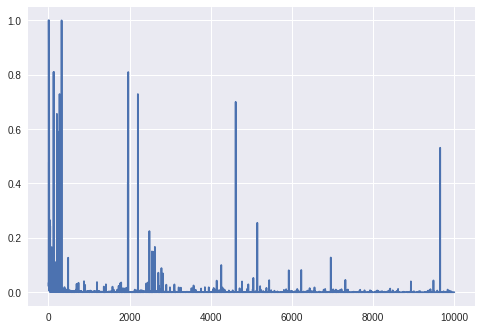

In [5]:
from __future__ import print_function, division
from builtins import range
# Note: you may need to update your version of future
# sudo pip install -U future

import numpy as np
import matplotlib.pyplot as plt
#from grid_world import standard_grid
#from utils import max_dict, print_values, print_policy

GAMMA = 0.9
EPSILON=0.2
ALL_POSSIBLE_ACTIONS = ('U', 'D', 'L', 'R')
N_EPISODES = 10000

# epsilon greedy action selection
def epsilon_action(a, eps=0.1):
  p = np.random.random()
  if p < (1 - eps):
    return a
  else:
    return np.random.choice(ALL_POSSIBLE_ACTIONS)

def play_game(grid, policy):
  # returns a list of states and corresponding returns
  s = (2, 0)
  grid.set_state(s)
  a = epsilon_action(policy[s], EPSILON)

  # keep in mind that reward is lagged by one time step
  # r(t) results from taking action a(t-1) from s(t-1) and landing in s(t)
  states_actions_rewards = [(s, a, 0)]
  while True:
    r = grid.move(a)
    s = grid.current_state()
    if grid.game_over():
      states_actions_rewards.append((s, None, r))
      break
    else:
      a = epsilon_action(policy[s], EPSILON)
      states_actions_rewards.append((s, a, r))

  # calculate the returns by working backwards from the terminal state
  G = 0
  states_actions_returns = []
  first = True
  for s, a, r in reversed(states_actions_rewards):
    # a terminal state has a value of 0 by definition
    # this is the first state we encounter in the reversed list
    # we'll ignore its return (G) since it doesn't correspond to any move
    if first:
      first = False
    else:
      states_actions_returns.append((s, a, G))
    G = r + GAMMA*G
  states_actions_returns.reverse() # back to the original order of states visited
  return states_actions_returns


def monte_carlo(grid):
  # initialize a random policy
  policy = {}
  for s in grid.actions.keys():
    policy[s] = np.random.choice(ALL_POSSIBLE_ACTIONS)

  # initialize Q(s,a) and returns
  Q = {}
  returns = {} # dictionary of state -> list of returns we've received
  states = grid.non_terminal_states()
  for s in states:
    Q[s] = {}
    for a in ALL_POSSIBLE_ACTIONS:
      Q[s][a] = 0
      returns[(s,a)] = []
  
  # keep track of how much our Q values change each episode so we can know when it converges
  deltas = []
  # repeat for the number of episodes specified (enough that it converges)
  for t in range(N_EPISODES):
    if t % 1000 == 0:
      print(t)

    # generate an episode using the current policy
    biggest_change = 0
    states_actions_returns = play_game(grid, policy)

    # calculate Q(s,a)
    seen_state_action_pairs = set()
    for s, a, G in states_actions_returns:
      # check if we have already seen s
      # first-visit Monte Carlo optimization
      sa = (s, a)
      if sa not in seen_state_action_pairs:
        returns[sa].append(G)
        old_q = Q[s][a]
        # the new Q[s][a] is the sample mean of all our returns for that (state, action)
        Q[s][a] = np.mean(returns[sa])
        biggest_change = max(biggest_change, np.abs(old_q - Q[s][a]))
        seen_state_action_pairs.add(sa)
    deltas.append(biggest_change)

    # calculate new policy pi(s) = argmax[a]{ Q(s,a) }
    for s in policy.keys():
      a, _ = max_dict(Q[s])
      policy[s] = a
  
  # calculate values for each state (just to print and compare)
  # V(s) = max[a]{ Q(s,a) }
  V = {}
  for s in policy.keys():
    V[s] = max_dict(Q[s])[1]
  
  return V, policy, deltas


if __name__ == '__main__':
  grid = standard_grid(obey_prob=1.0, step_cost=None)

  # print rewards
  print("rewards:")
  print_values(grid.rewards, grid)

  V, policy, deltas = monte_carlo(grid)

  print("final values:")
  print_values(V, grid)
  print("final policy:")
  print_policy(policy, grid)

  plt.plot(deltas)
  plt.show()

# Q Learning
A partially observable markov decicion process is one where we don't know what the true state looks like, but we can observe a part of it.<br>
A _Q table_ is one where the states are rows and actions are columns, it helps us find the best action to take for each state.<br>
_Q Learning_, is the process of learning what this Q table is directly, without needing to learn either the transition probability or reward function.

# Run TPU on Colab

In [5]:
import os
import numpy as np
import tensorflow as tf
import time

# TPU Benchmarch
tpu_address = 'grpc://' + os.environ['COLAB_TPU_ADDR']
print('TPU Address is', tpu_address)

with tf.Session(tpu_address) as session:
  devices = session.list_devices()
  
print('TPU Devices:', devices)

TPU Address is grpc://10.99.210.154:8470
TPU Devices: [_DeviceAttributes(/job:tpu_worker/replica:0/task:0/device:CPU:0, CPU, -1, 1324157668015504541), _DeviceAttributes(/job:tpu_worker/replica:0/task:0/device:XLA_CPU:0, XLA_CPU, 17179869184, 17925830785529702466), _DeviceAttributes(/job:tpu_worker/replica:0/task:0/device:XLA_GPU:0, XLA_GPU, 17179869184, 6943238829902747458), _DeviceAttributes(/job:tpu_worker/replica:0/task:0/device:TPU:0, TPU, 17179869184, 897833771215715781), _DeviceAttributes(/job:tpu_worker/replica:0/task:0/device:TPU:1, TPU, 17179869184, 6925443887496325425), _DeviceAttributes(/job:tpu_worker/replica:0/task:0/device:TPU:2, TPU, 17179869184, 15941686158536005639), _DeviceAttributes(/job:tpu_worker/replica:0/task:0/device:TPU:3, TPU, 17179869184, 3666343166592646238), _DeviceAttributes(/job:tpu_worker/replica:0/task:0/device:TPU:4, TPU, 17179869184, 12104073280341908582), _DeviceAttributes(/job:tpu_worker/replica:0/task:0/device:TPU:5, TPU, 17179869184, 5434887718980

In [6]:
# TPU Run
def add_op(x, y):
  return x + y

x = tf.placeholder(tf.float32, [100,])
y = tf.placeholder(tf.float32, [100,])
tpu_ops = tf.contrib.tpu.rewrite(add_op, [x,y])

session = tf.Session(tpu_address)

try:
  session.run(tf.contrib.tpu.initialize_system())
  start = time.time()
  print(session.run(tpu_ops, {x: np.arange(100), y: np.arange(100)}))
  end = time.time()
  elapsed = end -start
  print(elapsed)
finally:
  session.run(tf.contrib.tpu.shutdown_system(),)
  session.close()

[array([  0.,   2.,   4.,   6.,   8.,  10.,  12.,  14.,  16.,  18.,  20.,
        22.,  24.,  26.,  28.,  30.,  32.,  34.,  36.,  38.,  40.,  42.,
        44.,  46.,  48.,  50.,  52.,  54.,  56.,  58.,  60.,  62.,  64.,
        66.,  68.,  70.,  72.,  74.,  76.,  78.,  80.,  82.,  84.,  86.,
        88.,  90.,  92.,  94.,  96.,  98., 100., 102., 104., 106., 108.,
       110., 112., 114., 116., 118., 120., 122., 124., 126., 128., 130.,
       132., 134., 136., 138., 140., 142., 144., 146., 148., 150., 152.,
       154., 156., 158., 160., 162., 164., 166., 168., 170., 172., 174.,
       176., 178., 180., 182., 184., 186., 188., 190., 192., 194., 196.,
       198.], dtype=float32)]
0.01967453956604004


In [7]:
import tensorflow as tf
import tensorflow.keras.backend as K
import numpy as np
from tensorflow.contrib.tpu.python.tpu import keras_support
from tensorflow.keras.layers import Input, Conv2D, BatchNormalization, Activation, AveragePooling2D, Dense, Dropout, Flatten
from tensorflow.keras.datasets import cifar10
from tensorflow.keras.models import Model, Sequential
from tensorflow.keras.utils import to_categorical
import os

def basic_mlp_module(input, units):
    x = Dense(units)(input)
    x = BatchNormalization()(x)
    x = Activation("relu")(x)
    x = Dropout(0.5)(x)
    return x

def create_mlp_model():
    input = Input((32*32*3,))
    x = basic_mlp_module(input, 2048)
    x = basic_mlp_module(x, 1024)
    x = basic_mlp_module(x, 512)
    x = basic_mlp_module(x, 256)
    x = basic_mlp_module(x, 128)
    x = basic_mlp_module(x, 64)
    x = basic_mlp_module(x, 32)
    x = basic_mlp_module(x, 16)
    x = Dense(10, activation="softmax")(x)
    return Model(input, x)

def main():
    # 7 lets make this into TPU Code!!!
    K.clear_session()

    # CIFAR
    (X_train, y_train), (_, _) = cifar10.load_data()
    X_train = (X_train / 255.0).reshape(50000, -1)
    y_train = to_categorical(y_train)

    # Model building
    model = create_mlp_model()
    model.compile(tf.train.AdamOptimizer(learning_rate=1e-3), loss="categorical_crossentropy", metrics=["acc"])

    model.fit(X_train, y_train, batch_size=1024, epochs=10)

if __name__ == "__main__":
    main()

170500096/170498071 [==============================] - 55s 0us/step
Epoch 1/10
50000/50000 [==============================] - 48s 964us/step - loss: 2.5892 - acc: 0.1004
Epoch 2/10
50000/50000 [==============================] - 45s 906us/step - loss: 2.3921 - acc: 0.1030
Epoch 3/10
50000/50000 [==============================] - 46s 911us/step - loss: 2.3278 - acc: 0.1117
Epoch 4/10
50000/50000 [==============================] - 46s 921us/step - loss: 2.2989 - acc: 0.1206
Epoch 5/10
50000/50000 [==============================] - 47s 939us/step - loss: 2.2623 - acc: 0.1368
Epoch 6/10
50000/50000 [==============================] - 46s 925us/step - loss: 2.2223 - acc: 0.1530
Epoch 7/10
50000/50000 [==============================] - 46s 924us/step - loss: 2.1844 - acc: 0.1627
Epoch 8/10
50000/50000 [==============================] - 46s 926us/step - loss: 2.1455 - acc: 0.1715
Epoch 9/10
50000/50000 [==============================] - 46s 917us/step - loss: 2.1099 - acc: 0.1741
Epoch 10/10
50